In [174]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [175]:
# Load the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


In [176]:
# Normalize the Fashion-MNIST data
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test  = x_test.reshape(x_test.shape[0],  28, 28, 1)

In [177]:
# shapes and dtypes
print(x_test.shape, x_test.dtype) 
print(y_test.shape, np.unique(y_test))

(10000, 28, 28, 1) float32
(10000,) [0 1 2 3 4 5 6 7 8 9]


In [178]:
# Split for validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train,
    test_size=0.2,
    random_state=42
)

print(x_train.shape, x_val.shape, x_test.shape) 

(48000, 28, 28, 1) (12000, 28, 28, 1) (10000, 28, 28, 1)


In [179]:
# Build the CNN
model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/Users/panda/Desktop/VSCode Projects/178-final/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [180]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [181]:
# Train
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val),
    verbose=2
)

Epoch 1/10
750/750 - 11s - 14ms/step - accuracy: 0.7641 - loss: 0.6436 - val_accuracy: 0.8395 - val_loss: 0.4149
Epoch 2/10
750/750 - 9s - 12ms/step - accuracy: 0.8564 - loss: 0.4017 - val_accuracy: 0.8790 - val_loss: 0.3274
Epoch 3/10
750/750 - 9s - 12ms/step - accuracy: 0.8796 - loss: 0.3421 - val_accuracy: 0.8885 - val_loss: 0.3002
Epoch 4/10
750/750 - 9s - 12ms/step - accuracy: 0.8905 - loss: 0.3059 - val_accuracy: 0.8930 - val_loss: 0.2820
Epoch 5/10
750/750 - 10s - 13ms/step - accuracy: 0.9003 - loss: 0.2805 - val_accuracy: 0.9009 - val_loss: 0.2589
Epoch 6/10
750/750 - 10s - 13ms/step - accuracy: 0.9070 - loss: 0.2537 - val_accuracy: 0.8955 - val_loss: 0.2834
Epoch 7/10
750/750 - 10s - 13ms/step - accuracy: 0.9154 - loss: 0.2346 - val_accuracy: 0.9038 - val_loss: 0.2554
Epoch 8/10
750/750 - 10s - 14ms/step - accuracy: 0.9201 - loss: 0.2182 - val_accuracy: 0.9126 - val_loss: 0.2393
Epoch 9/10
750/750 - 10s - 14ms/step - accuracy: 0.9261 - loss: 0.1992 - val_accuracy: 0.9105 - val

In [182]:
# Evaluate on train, val, test
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
val_loss, val_acc     = model.evaluate(x_val, y_val, verbose=0)
test_loss, test_acc   = model.evaluate(x_test, y_test, verbose=0)

print(f"Train    loss: {train_loss:.4f}   acc: {train_acc:.4f}")
print(f"Val      loss: {val_loss:.4f}   acc: {val_acc:.4f}")
print(f"Test     loss: {test_loss:.4f}   acc: {test_acc:.4f}\n")

Train    loss: 0.1400   acc: 0.9472
Val      loss: 0.2545   acc: 0.9087
Test     loss: 0.2642   acc: 0.9094



In [183]:
# Predictions on test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [184]:
# Classification report
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred, target_names=class_names))

Classification Report (Test Set):
              precision    recall  f1-score   support

     T-shirt       0.89      0.83      0.86      1000
     Trouser       1.00      0.97      0.99      1000
    Pullover       0.86      0.87      0.86      1000
       Dress       0.91      0.91      0.91      1000
        Coat       0.83      0.89      0.86      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.75      0.74      0.75      1000
     Sneaker       0.93      0.99      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



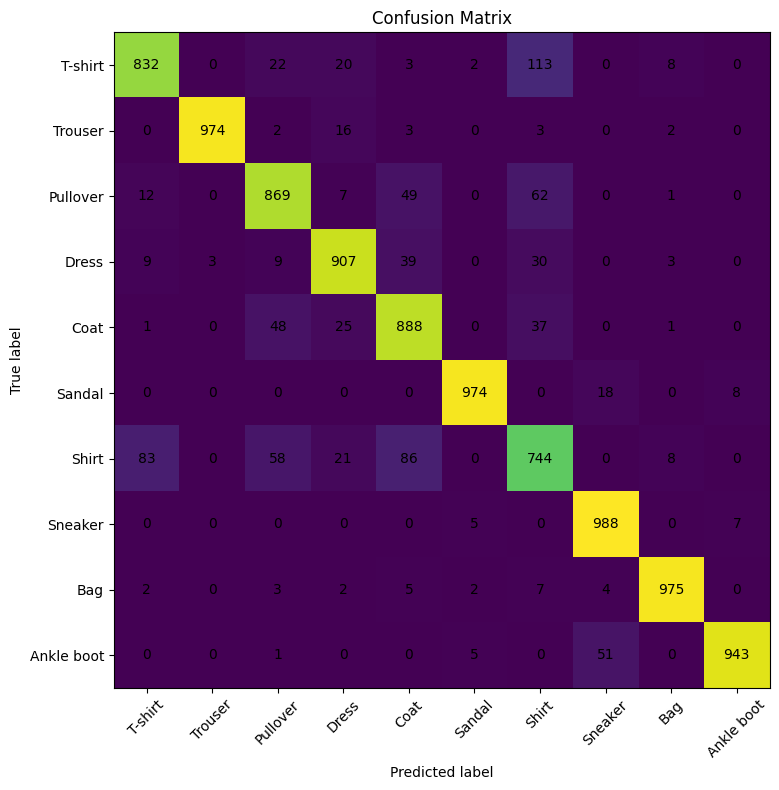

In [185]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(np.arange(10), class_names, rotation=45)
plt.yticks(np.arange(10), class_names)
# annotate counts
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')
plt.tight_layout()
plt.show()

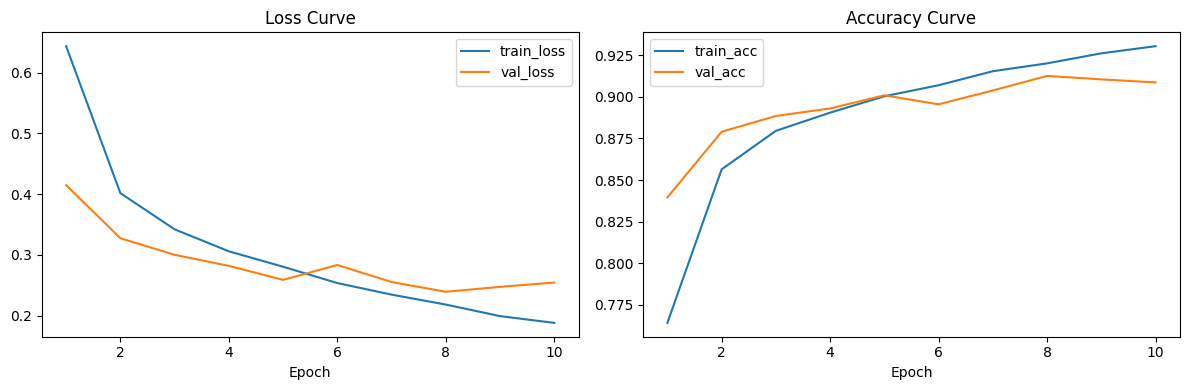

In [186]:
# Learning curves (loss & accuracy over epochs)
epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(epochs, history.history['loss'], label='train_loss')
plt.plot(epochs, history.history['val_loss'], label='val_loss')
plt.title('Loss Curve'); plt.xlabel('Epoch'); plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, history.history['accuracy'], label='train_acc')
plt.plot(epochs, history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy Curve'); plt.xlabel('Epoch'); plt.legend()

plt.tight_layout()
plt.show()

In [187]:
# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Final Test loss: {test_loss:.4f}")
print(f"Final Test accuracy: {test_acc:.4f}")

Final Test loss: 0.2642
Final Test accuracy: 0.9094


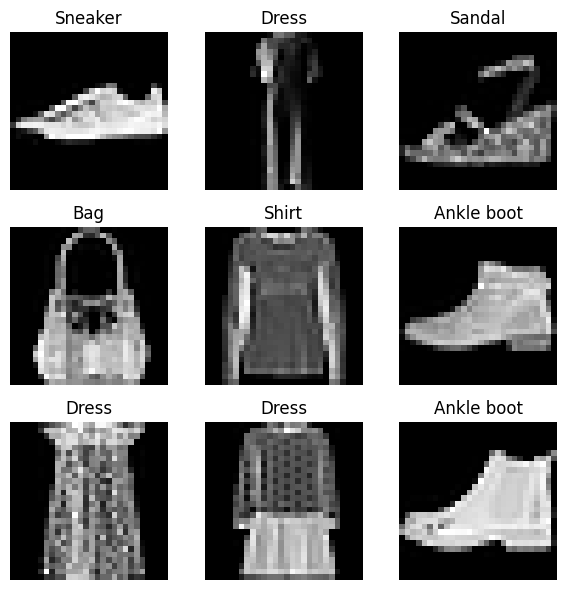

In [188]:
# Show a few training samples
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()